#### Import libraries and read files

In [70]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os

from PIL import Image

from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

In [4]:
df = pd.read_csv("/workspaces/Artist_Emotions-1/data/WikiArt-info.tsv", sep='\t')
df.head()

,ID,Category,Artist,Title,Year,Image URL,Painting Info URL,Artist Info URL
0,58c6237dedc2c9c7dc0de1ae,Impressionism,Charles Courtney Curran,In the Luxembourg Garden,1889,https://uploads3.wikiart.org/00123/images/char...,https://www.wikiart.org/en/charles-courtney-cu...,https://www.wikiart.org/en/charles-courtney-cu...
1,577280dfedc2cb3880f28e76,Neo-Expressionism,Keith Haring,The Marriage of Heaven and Hell,1984,https://uploads1.wikiart.org/images/keith-hari...,https://www.wikiart.org/en/keith-haring/the-ma...,https://www.wikiart.org/en/keith-haring
2,57727f2dedc2cb3880ed5fa9,Post-Impressionism,Jozsef Rippl-Ronai,Uncle Piacsek in front of the Black Sideboard,1906,https://uploads3.wikiart.org/images/j-zsef-rip...,https://www.wikiart.org/en/jozsef-rippl-ronai/...,https://www.wikiart.org/en/jozsef-rippl-ronai
3,58d1240cedc2c94f900fc610,Cubism,Vadym Meller,Monk. For the Play &#39;Mazeppa&#39;,1920,https://uploads2.wikiart.org/00124/images/vady...,https://www.wikiart.org/en/vadym-meller/monk-f...,https://www.wikiart.org/en/vadym-meller
4,57727de7edc2cb3880e91f26,Romanticism,David Wilkie,The Defence of Sarago&#231;a,1828,https://uploads6.wikiart.org/images/david-wilk...,https://www.wikiart.org/en/david-wilkie/the-de...,https://www.wikiart.org/en/david-wilkie


In [5]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [225]:
dir = "/workspaces/Artist_Emotions-1/images2"

In [226]:
def get_image_paths(facedir):
    image_paths = []
    if os.path.isdir(facedir):
        images = os.listdir(facedir)
        image_paths = [os.path.join(facedir,img) for img in images]
    return image_paths 

In [227]:
image_paths = get_image_paths(dir)

In [228]:
image_paths

['/workspaces/Artist_Emotions-1/images2/1869-1875.jpg',
 '/workspaces/Artist_Emotions-1/images2/1944-n-no-1-1944.jpg',
 '/workspaces/Artist_Emotions-1/images2/1993-1994.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-bar-at-the-folies-bergere-1882-1.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-box-at-the-italian-theatre-1874.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-drowned-woman-found-drowned-1867.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-festa-1942.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-for-apple-1963.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-fortune-teller-at-venice.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-green-neck-duck-with-a-seville-orange.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-hilltop-naples-1782.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-nose-adjustment-face-farce-1971.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-room-in-the-second-post-impressionist-1912.jpg',
 '/workspaces/Artist_Emotions-1/images2/a-tree-poem-1991.jpg',


In [229]:
p_path =image_paths[39]
p_path

'/workspaces/Artist_Emotions-1/images2/crimson-glory-1988.jpg'

In [230]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [231]:
image = get_image(p_path)

In [232]:
number_of_colors = 6
show_chart = 1

In [233]:
def get_colors(image, number_of_colors, show_chart):
# def get_colors(image, number_of_colors):

    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)

    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)

    counts = Counter(labels)

    center_colors = clf.cluster_centers_

    ordered_colors = [center_colors[i] for i in counts.keys()]

    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]

    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)


        
    return rgb_colors
    



[array([163.98262302, 102.79168881, 114.37756403]),
 array([16.8644526 ,  6.72302323, 10.04622014]),
 array([127.65937175,  40.34909741,  67.5504773 ]),
 array([178.12635506,  44.64555629,  34.94689489]),
 array([220.8170107 , 108.49170489, 146.68207187]),
 array([185.72841038,  42.35936614,  99.24292754])]

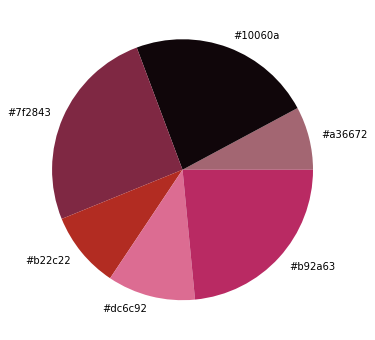

In [234]:
get_colors(image, number_of_colors, show_chart)
# get_colors(image, number_of_colors)

### Search Images using color

In [160]:
# IMAGE_DIRECTORY = 'images'
IMAGE_DIRECTORY = dir
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))


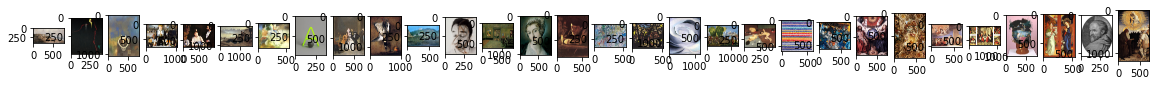

In [96]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [161]:
threshold = 55

In [146]:
color =  COLORS['YELLOW']

In [162]:
def match_image_by_color(image, color, threshold , number_of_colors): 
    
    image_colors = get_colors(image, number_of_colors)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        #finding delta (difference between current color and other colors in the loop)
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [163]:
colors_to_match = match_image_by_color(image, color, threshold, number_of_colors)


In [169]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1
    print(index)

In [170]:
selected_color = COLORS['YELLOW']

8


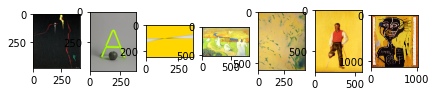

In [171]:
plt.figure(figsize = (20, 10))
show_selected_images(images, selected_color, 55, 4)